In [1]:
# Import Data manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging files 
import logging 
logging.basicConfig(level= logging.INFO,
                    filemode= 'w',
                    filename= 'model.log',
                    format= '%(asctime)s - %(levelname)s -  %(message)s', force = True) 
# import stats scipy library
import scipy.stats as stats                   

In [2]:
# Data Input Using Pandas function 

url = 'https://raw.githubusercontent.com/adnansayyedd/BankMarketing_MLModel/refs/heads/main/BankTelemarketing.csv' 

df = pd.read_csv(url,sep = ';') 

df.sample(frac = 1) #shuffle dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5746,57,technician,married,secondary,no,3284,yes,no,unknown,26,may,63,1,-1,0,unknown,no
24679,54,technician,married,unknown,no,1162,no,no,telephone,17,nov,37,2,-1,0,unknown,no
4060,26,technician,divorced,secondary,no,379,yes,yes,unknown,19,may,501,3,-1,0,unknown,no
30114,42,technician,single,tertiary,no,3908,yes,no,telephone,4,feb,43,5,-1,0,unknown,no
23256,46,management,married,tertiary,no,0,no,no,cellular,27,aug,121,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,55,self-employed,married,secondary,no,181,no,no,cellular,4,aug,68,1,-1,0,unknown,no
33941,35,admin.,married,secondary,no,-312,no,no,cellular,30,apr,116,1,21,1,failure,no
40193,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
18164,40,blue-collar,married,secondary,no,384,no,yes,cellular,30,jul,142,3,-1,0,unknown,no


In [3]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


((45211, 17), None)

In [4]:
logging.info('Dataset Uploaded Succesfully...')

In [5]:
# Split The Data Into Numerical_Data And Categorical_Data

Numerical_Data = df.select_dtypes(exclude = 'object')

Categorical_Data = df.select_dtypes(include = 'object')

In [6]:
# Checking Numerical_Data
Numerical_Data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [7]:
# Checking Categorical Data
Categorical_Data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [8]:
# Checking Descriptive Stats: Numerical_data abd Categorical_Data

from collections import OrderedDict

stats = []

for i in Numerical_Data:

    Numerical_stats = OrderedDict({
        'feature' : i,
        'Maximum': Numerical_Data[i].max(),
        'Minimum': Numerical_Data[i].min(),
        'mean': Numerical_Data[i].mean(),
        'median': Numerical_Data[i].median(),
        '25': Numerical_Data[i].quantile(0.25),
        '75': Numerical_Data[i].quantile(0.75),
        'kurtosis':Numerical_Data[i].kurt(),
        'skewness': Numerical_Data[i].skew(),
        'standard Deviation': Numerical_Data[i].std()
    })

    stats.append(Numerical_stats)
    report = pd.DataFrame(stats)

report




,feature,Maximum,Minimum,mean,median,25,75,kurtosis,skewness,standard Deviation
0,age,95,18,40.936210,39.0,33.0,48.0,0.319570,0.684818,10.618762
1,balance,102127,-8019,1362.272058,448.0,72.0,1428.0,140.751547,8.360308,3044.765829
2,day,31,1,15.806419,16.0,8.0,21.0,-1.059897,0.093079,8.322476
3,duration,4918,0,258.163080,180.0,103.0,319.0,18.153915,3.144318,257.527812
4,campaign,63,1,2.763841,2.0,1.0,3.0,39.249651,4.898650,3.098021
5,pdays,871,-1,40.197828,-1.0,-1.0,-1.0,6.935195,2.615715,100.128746
6,previous,275,0,0.580323,0.0,0.0,0.0,4506.860660,41.846454,2.303441


In [9]:
logging.info('The above datset id non normsl distributed dataset')

In [10]:
#CHecking Categorical Dataset stats
for i in Categorical_Data:
    print(Categorical_Data[i].value_counts())
    print('*'*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
****************************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
****************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
****************************************
default
no     44396
yes      815
Name: count, dtype: int64
****************************************
housing
yes    25130
no     20081
Name: count, dtype: int64
****************************************
loan
no     37967
yes     7244
Name: count, dtype: int64
****************************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

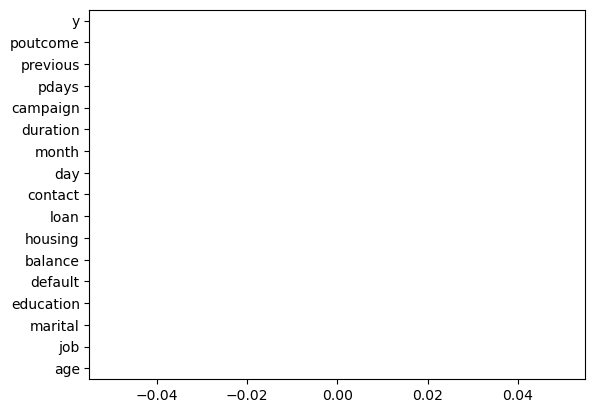

In [11]:
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [12]:
#checking Output i.e Target Column for Data Distribution
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [13]:
#Encoding Target Column 
# No: 0 and yes: 1
df['y']=df['y'].replace({'no':0,'yes':1})

In [14]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [15]:
#Encoding Default Column
 
df['default']=df['default'].replace({'no':0,'yes':1})

In [16]:
df.default.value_counts()

default
0    44396
1      815
Name: count, dtype: int64

In [17]:
df.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [18]:
#Encoding Hosing Column

df['housing']=df['housing'].replace({'no':0,'yes':1})

In [19]:
#Encoding Loan Column

df['loan']=df['loan'].replace({'no':0,'yes':1})

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [21]:
# Using the label incoding Technique
from sklearn.preprocessing import LabelEncoder
df['job'] = LabelEncoder().fit_transform(df['job'] )
df['job']


0         4
1         9
2         2
3         1
4        11
         ..
45206     9
45207     5
45208     5
45209     1
45210     2
Name: job, Length: 45211, dtype: int32

In [22]:
df['job']=LabelEncoder().fit_transform(df['job'])
df['marital']=LabelEncoder().fit_transform(df['marital'])
df['education']=LabelEncoder().fit_transform(df['education'])
df['contact']=LabelEncoder().fit_transform(df['contact'])
df['poutcome']=LabelEncoder().fit_transform(df['poutcome'])
df['month']=LabelEncoder().fit_transform(df['month'])

In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [24]:
# second method alternative code
''''
le = LabelEncoder()
for i in Categorical_Data:
    df[i] = le.fit_transform(df[i])
'''    

"'\nle = LabelEncoder()\nfor i in Categorical_Data:\n    df[i] = le.fit_transform(df[i])\n"

In [25]:
# the target clmn the shows the imbalanced dataset
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [29]:
# balancing the target ckmn using the smote technique:

#step1: divide dataset into X and y
# X : independent clmn
# y : target clmn

X = df.drop(columns = 'y') # independent clmn: 16

y = df['y'] # Target clmn : 1



# step 2 : split the dataset into train and test 
#100%----- 70% data is used for training [seen data] and 30% data [unseen] is used for testing 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=10)

# step 3: Normalization/ scaling Technique








In [30]:
# step 3 : Normalization/ scaling Technique
# Standard Scaler---- When Dataset is Normally Distributed
# MinMax Scaler----- When Dataset having Minor Outliers
# Robust Scaler----- When Datset is non normal Distributedc and having lots of outliers

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train

# Step 4: Using SMOTE Technique to Balance Target Column
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Step 5 : After Balancing the Target Column for Binary Classification Model use Logistic Regression

'''
Note : 
        1 : TP --> True Positive
        2 : TN --> True Negetive 
        3 : FP --> False Positive 
        4 : FN --> False Negetive

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = (TP) / (TP + FP)  ----> PPV

Recall = (TP) / (TP + FP)  ---->

F1 Score = 2 *  ((Precission * Recall) / (Precision + Recall))
'''
# Import Model Preprocessing Library from Sklearn
from sklearn.linear_model import LogisticRegression

# Implement Logistics regression to our Binary Classification Model
LR = LogisticRegression()

# Fit The Model on Training Dataset 
LR.fit(X_train,y_train)

# Predict the Value Based on Test Dataset
y_pred = LR.predict(X_test)

# Step 6 : Use Matrix to Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report

accuracy_score_LR = accuracy_score(y_test,y_pred)

accuracy_score_LR

  File "c:\Users\admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\admin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


0.8150987909171336

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     12006
           1       0.36      0.79      0.49      1558

    accuracy                           0.82     13564
   macro avg       0.66      0.80      0.69     13564
weighted avg       0.90      0.82      0.84     13564



In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[9830, 2176],
       [ 332, 1226]], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[9830, 2176],
       [ 332, 1226]], dtype=int64)

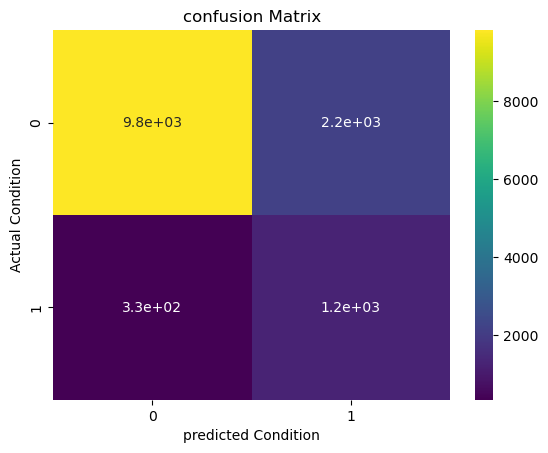

In [35]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap = 'viridis')
plt.title('confusion Matrix')
plt.xlabel('predicted Condition')
plt.ylabel('Actual Condition')
plt.show()

Random Forest Classifior

In [40]:
from sklearn.ensemble import RandomForestClassifier 

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_predict_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

accuracy_score_RF


0.8956797404895311

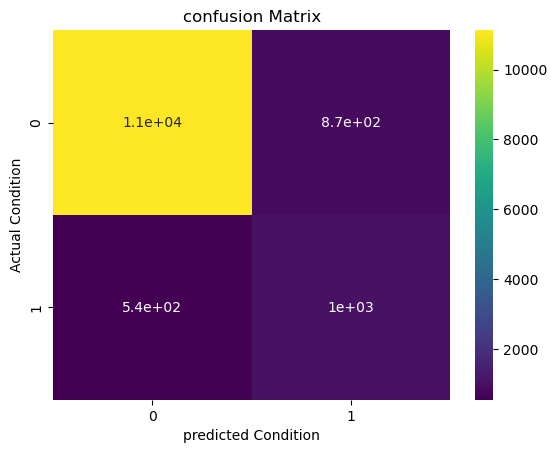

In [41]:
# Confusion Matrix For Random Forest Classifiacation Model

sns.heatmap(confusion_matrix(y_test,y_predict_RF),cmap='viridis',annot=True)
plt.title('confusion Matrix')
plt.xlabel('predicted Condition')
plt.ylabel('Actual Condition')
plt.show()
